In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/pbl research/BTC-USD.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-11,361.362000,367.191010,355.950989,362.299011,362.299011,13345200
1,2014-10-12,362.605988,379.433014,356.144012,378.549011,378.549011,17552800
2,2014-10-13,377.920990,397.226013,368.897003,390.414001,390.414001,35221400
3,2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,38491500
4,2014-10-15,400.954987,402.226990,388.765991,394.773010,394.773010,25267100


In [5]:
# Drop the 'Date' column as it's not needed for modeling
data = data.drop(columns=['Date'])

In [6]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
# Define the number of time steps for the GRU model
time_steps = 10  # You can adjust this according to your need

In [8]:
# Prepare data with time steps
X = []
y = []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps, :])
    y.append(data_scaled[i+time_steps, 1])  # Assuming 'Open' price is the target

X = np.array(X)
y = np.array(y)

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [10]:
# Build the GRU model
model = Sequential()
model.add(GRU(64, activation='sigmoid', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(64, activation='sigmoid', return_sequences=True))
model.add(GRU(64, activation='sigmoid', return_sequences=True))
model.add(GRU(64, activation='sigmoid', return_sequences=True))
model.add(GRU(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
41/41 [==============================] - 11s 61ms/step - loss: 0.0940 - mae: 0.2519 - val_loss: 0.1158 - val_mae: 0.2963
Epoch 2/50
41/41 [==============================] - 2s 52ms/step - loss: 0.0475 - mae: 0.1388 - val_loss: 0.1196 - val_mae: 0.3027
Epoch 3/50
41/41 [==============================] - 4s 99ms/step - loss: 0.0475 - mae: 0.1412 - val_loss: 0.1149 - val_mae: 0.2949
Epoch 4/50
41/41 [==============================] - 2s 45ms/step - loss: 0.0474 - mae: 0.1422 - val_loss: 0.1151 - val_mae: 0.2952
Epoch 5/50
41/41 [==============================] - 2s 42ms/step - loss: 0.0474 - mae: 0.1428 - val_loss: 0.1141 - val_mae: 0.2935
Epoch 6/50
41/41 [==============================] - 2s 40ms/step - loss: 0.0475 - mae: 0.1449 - val_loss: 0.1163 - val_mae: 0.2972
Epoch 7/50
41/41 [==============================] - 2s 41ms/step - loss: 0.0475 - mae: 0.1412 - val_loss: 0.1158 - val_mae: 0.2963
Epoch 8/50
41/41 [==============================] - 2s 42ms/step - loss: 0.0475 - 

In [13]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

21/21 [==============================] - 0s 13ms/step - loss: 0.0016 - mae: 0.0344
Mean Absolute Error: 0.03437069058418274


In [14]:
# Make predictions
predictions = model.predict(X_test)

21/21 [==============================] - 1s 12ms/step


In [15]:
# Inverse transform the predictions and true values to the original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], predictions), axis=1))[:, -1]
true_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

In [16]:
import matplotlib.pyplot as plt

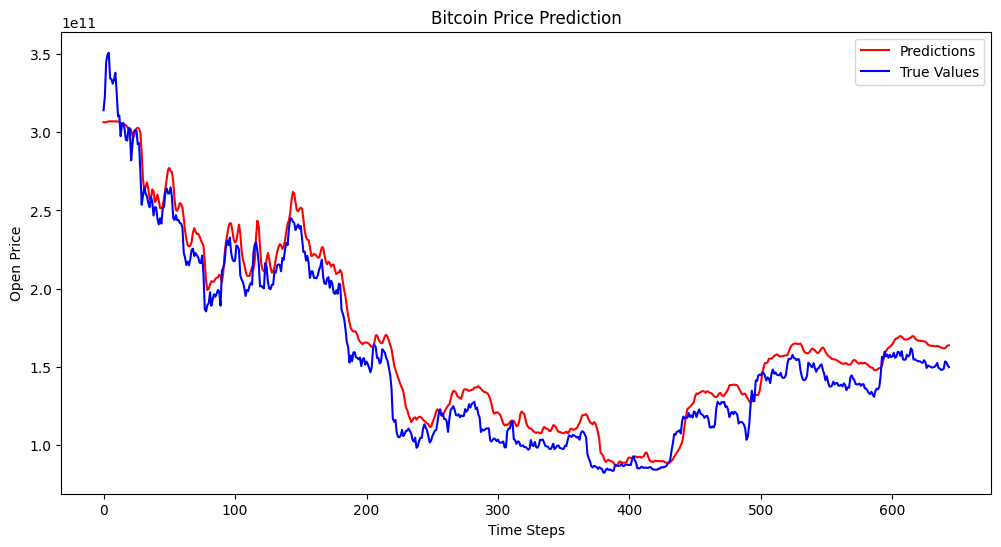

In [17]:
# Plot predictions vs. true values
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predictions', color='red')
plt.plot(true_values, label='True Values', color='blue')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Open Price')
plt.legend()
plt.show()

In [18]:
# Calculate percentage error
percentage_error = (abs(predictions - true_values) / true_values) * 100

# Print the percentage error
for i, error in enumerate(percentage_error):
    print(f"Sample {i+1}: Percentage Error = {error:.2f}%")

# Calculate and print the mean percentage error
mean_percentage_error = np.mean(percentage_error)
print("\nMean Percentage Error:", mean_percentage_error)

Sample 1: Percentage Error = 2.43%
Sample 2: Percentage Error = 5.14%
Sample 3: Percentage Error = 11.23%
Sample 4: Percentage Error = 12.26%
Sample 5: Percentage Error = 12.53%
Sample 6: Percentage Error = 8.21%
Sample 7: Percentage Error = 8.05%
Sample 8: Percentage Error = 7.29%
Sample 9: Percentage Error = 8.12%
Sample 10: Percentage Error = 9.21%
Sample 11: Percentage Error = 5.55%
Sample 12: Percentage Error = 1.07%
Sample 13: Percentage Error = 1.36%
Sample 14: Percentage Error = 2.87%
Sample 15: Percentage Error = 0.00%
Sample 16: Percentage Error = 0.34%
Sample 17: Percentage Error = 0.94%
Sample 18: Percentage Error = 3.17%
Sample 19: Percentage Error = 2.95%
Sample 20: Percentage Error = 0.09%
Sample 21: Percentage Error = 0.26%
Sample 22: Percentage Error = 6.90%
Sample 23: Percentage Error = 1.89%
Sample 24: Percentage Error = 1.00%
Sample 25: Percentage Error = 0.33%
Sample 26: Percentage Error = 0.45%
Sample 27: Percentage Error = 3.58%
Sample 28: Percentage Error = 3.17

In [19]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and true values to the original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], predictions), axis=1))[:, -1]
true_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Define a threshold for investment decision
invest_threshold = 1.0  # You can adjust this threshold as needed

21/21 [==============================] - 0s 8ms/step


In [20]:
# Determine investment decisions and print the results
for i in range(len(predictions)):
    if predictions[i] > X_test[i, -1, 1] * invest_threshold:
        decision = "Invest"
    else:
        decision = "Do not invest"

    print(f"Predicted Price: {predictions[i]:.2f} | Current Open Price: {X_test[i, -1, 1]:.2f} | Decision: {decision}")


Predicted Price: 306481122483.68 | Current Open Price: 0.91 | Decision: Invest
Predicted Price: 306394204176.03 | Current Open Price: 0.90 | Decision: Invest
Predicted Price: 306478925992.15 | Current Open Price: 0.92 | Decision: Invest
Predicted Price: 306789133352.96 | Current Open Price: 0.98 | Decision: Invest
Predicted Price: 307001523624.34 | Current Open Price: 1.00 | Decision: Invest
Predicted Price: 307061791168.10 | Current Open Price: 1.00 | Decision: Invest
Predicted Price: 307054615962.44 | Current Open Price: 0.95 | Decision: Invest
Predicted Price: 307013321921.69 | Current Open Price: 0.95 | Decision: Invest
Predicted Price: 306982424607.52 | Current Open Price: 0.94 | Decision: Invest
Predicted Price: 306993595335.86 | Current Open Price: 0.95 | Decision: Invest
Predicted Price: 306997465344.75 | Current Open Price: 0.96 | Decision: Invest
Predicted Price: 306878018043.50 | Current Open Price: 0.93 | Decision: Invest
Predicted Price: 306622597457.12 | Current Open Pric

In [21]:
# Calculate daily price changes for true values and predictions
true_price_changes = true_values[1:] - true_values[:-1]
predicted_price_changes = predictions[1:] - true_values[:-1]

# Define a threshold for considering a change as profitable or in loss
profit_threshold = 0.0  # You can adjust this threshold based on your preference

# Calculate whether the predictions are in profit or loss
profit_or_loss = np.where(predicted_price_changes > profit_threshold, 'Profit', 'Loss')

# Print whether each prediction is in profit or loss
for i in range(len(profit_or_loss)):
    print(f"Prediction {i+1}: {profit_or_loss[i]}")

Prediction 1: Loss
Prediction 2: Loss
Prediction 3: Loss
Prediction 4: Loss
Prediction 5: Loss
Prediction 6: Loss
Prediction 7: Loss
Prediction 8: Loss
Prediction 9: Loss
Prediction 10: Loss
Prediction 11: Loss
Prediction 12: Loss
Prediction 13: Loss
Prediction 14: Profit
Prediction 15: Loss
Prediction 16: Loss
Prediction 17: Profit
Prediction 18: Profit
Prediction 19: Profit
Prediction 20: Loss
Prediction 21: Loss
Prediction 22: Profit
Prediction 23: Profit
Prediction 24: Profit
Prediction 25: Profit
Prediction 26: Profit
Prediction 27: Profit
Prediction 28: Profit
Prediction 29: Profit
Prediction 30: Profit
Prediction 31: Profit
Prediction 32: Profit
Prediction 33: Profit
Prediction 34: Profit
Prediction 35: Profit
Prediction 36: Profit
Prediction 37: Profit
Prediction 38: Profit
Prediction 39: Profit
Prediction 40: Profit
Prediction 41: Profit
Prediction 42: Profit
Prediction 43: Profit
Prediction 44: Profit
Prediction 45: Profit
Prediction 46: Profit
Prediction 47: Profit
Predictio

In [22]:
# Define a threshold for considering a trade profitable or in loss
profit_threshold = 0.02  # 2% profit
loss_threshold = -0.02   # 2% loss

# Calculate the price change from the previous day
price_change = true_values[1:] - true_values[:-1]

# Initialize lists to store trade decisions
trade_actions = []
trade_results = []

# Loop through the predictions and calculate trade decisions
for i in range(len(predictions)):
    if i == 0:
        trade_actions.append("HOLD")
        trade_results.append("N/A")
    else:
        if (predictions[i] - true_values[i-1]) / true_values[i-1] > profit_threshold:
            trade_actions.append("SELL")
            trade_results.append("Profit")
        elif (predictions[i] - true_values[i-1]) / true_values[i-1] < loss_threshold:
            trade_actions.append("SELL")
            trade_results.append("Loss")
        else:
            trade_actions.append("HOLD")
            trade_results.append("N/A")

# Print the trade decisions along with the results
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]:.2f}, True Value: {true_values[i]:.2f}, Action: {trade_actions[i]}, Result: {trade_results[i]}")


Prediction: 306481122483.68, True Value: 314125820495.24, Action: HOLD, Result: N/A
Prediction: 306394204176.03, True Value: 323011730761.13, Action: SELL, Result: Loss
Prediction: 306478925992.15, True Value: 345257172736.09, Action: SELL, Result: Loss
Prediction: 306789133352.96, True Value: 349640974296.85, Action: SELL, Result: Loss
Prediction: 307001523624.34, True Value: 350967941479.00, Action: SELL, Result: Loss
Prediction: 307061791168.10, True Value: 334536961928.76, Action: SELL, Result: Loss
Prediction: 307054615962.44, True Value: 333932052167.59, Action: SELL, Result: Loss
Prediction: 307013321921.69, True Value: 331142178528.30, Action: SELL, Result: Loss
Prediction: 306982424607.52, True Value: 334107913606.30, Action: SELL, Result: Loss
Prediction: 306993595335.86, True Value: 338132435673.20, Action: SELL, Result: Loss
Prediction: 306997465344.75, True Value: 325029169485.32, Action: SELL, Result: Loss
Prediction: 306878018043.50, True Value: 310200154263.76, Action: 